In [1]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np

from matplotlib.backends.backend_pdf import PdfPages
sys.path.append('../..')
sys.path.append( '/home/cactuskid13/miniconda3/pkgs/')
print(sys.path)

['/home/cactuskid13/pyprofiler/pyprofiler/notebooks', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python37.zip', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/lib-dynload', '', '/home/cactuskid13/.local/lib/python3.7/site-packages', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages', '/home/cactuskid13/pyham', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/IPython/extensions', '/home/cactuskid13/.ipython', '../..', '/home/cactuskid13/miniconda3/pkgs/']


In [2]:
#using the profiler. It's easy!
#lets import the profiler, configuration file and some tools for GO analysis to look at our returned results
from pyprofiler.utils import config_utils
import pyprofiler.utils.goatools_utils as goa
import pyprofiler.profiler as profiler



{'dir': {'datadir': '/home/cactuskid13/pyprofiler/pyprofiler/all/all/', 'omadir': '/home/cactuskid13/mntpt/OMA/latest/'}, 'orthoxmltar': '', 'email': 'dmoi@unil.ch'}


In [3]:
#lets also create a go annotation enrichment study object to describe functional enrichment in our profiling results
gaf = goa.buildGAF( '/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/oma-go.txt' )
study = goa.return_enrichment_study_obj( gaf , obo = '/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/go.obo')

/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/go.obo: fmt(1.2) rel(2019-11-02) 47,242 GO Terms

Load GOEA Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
100% 9,897,212 of 9,897,212 population items found in association


In [4]:
#lets load a compiled db containing the OMA root HOGs into a profiler oject 
p = profiler.Profiler(lshforestpath = config_utils.datadir+'jun_all_512/newlshforest.pkl' , hashes_h5=config_utils.datadir  +'jun_all_512/hashes.h5' , mat_path= None, oma = '/home/cactuskid13/mntpt/OMA/jun/OmaServer.h5', tar= None , nsamples = 512 , mastertree = config_utils.datadir+'jun_all_512_master_tree.pkl')

loading lsh
indexing lsh


Cannot load SequenceSearch. Any future call to seq_search will fail!
Traceback (most recent call last):
  File "../../pyprofiler/pyoma/browser/db.py", line 879, in __init__
    self.seq_idx = self.seq_idx()
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/link.py", line 397, in __call__
    self.extfile = tables.open_file(filename, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 320, in open_file
    return File(filename, mode, title, root_uep, filters, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 784, in __init__
    self._g_new(filename, mode, **params)
  File "tables/hdf5extension.pyx", line 374, in tables.hdf5extension.File._g_new
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/utils.py", line 157, in check_file_access
    raise IOError("``%s`` does not exist" % (filena

3115
DONE


In [5]:

def grabHog(ID, verbose = True):
    try:
        return p.db_obj.entry_by_entry_nr(p.db_obj.id_resolver.resolve(ID))[4].decode()
    except:
        return np.nan

#map to OMA HOGs

In [6]:
print( grabHog('F4JP36') ) 
print( grabHog('YAL047C' ) )


HOG:0406399.2a.10b
HOG:0218807


In [38]:
#load the kinetochore data and map it to OMA HOGs
#these are blast results against oma since they had their own adhoc IDs
kinetodf = pd.DataFrame.from_csv('kineto_mapping.csv', header = None)
#filter by evalue
kinetodf= kinetodf[kinetodf[10]< .000001]
kinetodf['name'] = kinetodf.index.map( lambda x : x.split('_')[-1] )
kinetodf['HOG'] = kinetodf[1].map(grabHog)
print(kinetodf.head())
kinetodf.to_csv('kineto_mapping.csv')

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [42]:
kinetodf = pd.DataFrame.from_csv('kineto_mapping.csv')

kinetodf = kinetodf.dropna(subset=['HOG'] , axis=0)
print(kinetodf)

                                                1        2     3    4   5  \
0                                                                           
Homo_sapiens_HSAP017770_ANAPC1_Apc1    HUMAN17502  100.000  1944    0   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    CHLSB04039   99.383  1944   12   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PAPAN05104   99.331  1944   13   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PANTR28460   99.126  1945   14   2   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    CALJA06361   98.405  1944   30   1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    FELCA03737   97.274  1944   53   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    HORSE05873   97.171  1944   55   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    MUSPF05472   97.274  1944   53   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    RABIT08361   96.914  1944   60   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PIGXX21392   96.862  1944   61   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    CANLF05104   96.109  1953   66   4   

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [43]:
#lets search for interactors of each HOG in our dataset and map them back to the dataframe
from pyprofiler.utils.hashutils import hogid2fam
#print(kinetodf)
print(len(kinetodf.HOG.unique()))
print(len(kinetodf.name.unique()))
kinetodf['topHOG'] = kinetodf.HOG.map(lambda x : str(x).split('.')[0])
Hogs = []

#lets just grab the top one closest to the human sequence with a HOG ID
for n in kinetodf.name.unique():
    sub = kinetodf[kinetodf.name == n ]
    for Hog in list(sub.topHOG.unique())[0:3]:
        if len(Hog)>0:
            Hogs.append(Hog)
print(Hogs)
print(len(set(Hogs)))

4200
89
['HOG:0397431', 'HOG:0409203', 'HOG:0390733', 'HOG:0217889', 'HOG:0373006', 'HOG:0354438', 'HOG:0394532', 'HOG:0371013', 'HOG:0605249', 'HOG:0420946', 'HOG:0420607', 'HOG:0172386', 'HOG:0366264', 'HOG:0603663', 'HOG:0352864', 'HOG:0354613', 'HOG:0383489', 'HOG:0357260', 'HOG:0363570', 'HOG:0379370', 'HOG:0366226', 'HOG:0218415', 'HOG:0252529', 'HOG:0255123', 'HOG:0372963', 'HOG:0365955', 'HOG:0393988', 'HOG:0260009', 'HOG:0214005', 'HOG:0375966', 'HOG:0327049', 'HOG:0334576', 'HOG:0390011', 'HOG:0340198', 'HOG:0420308', 'HOG:0365745', 'HOG:0362181', 'HOG:0368754', 'HOG:0392167', 'HOG:0389803', 'HOG:0403265', 'HOG:0358495', 'HOG:0353946', 'HOG:0381237', 'HOG:0413144', 'HOG:0364121', 'HOG:0367903', 'HOG:0366348', 'HOG:0359514', 'HOG:0343396', 'HOG:0217941', 'HOG:0406831', 'HOG:0347716', 'HOG:0381148', 'HOG:0362214', 'HOG:0357309', 'HOG:0359359', 'HOG:0403075', 'HOG:0612245', 'HOG:0408684', 'HOG:0408225', 'HOG:0355083', 'HOG:0114188', 'HOG:0218352', 'HOG:0369639', 'HOG:0395896', '

In [44]:
#now we can make a second dataframe with the hash signatures of each of our queries
#reading the hdf5 and grabbing all the hash signatures may take a moment
profiles = p.pull_hashes( set(Hogs) )

print(len(profiles))
names = dict( zip( kinetodf.topHOG , kinetodf.name) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  }  for h in profiles if h in names}
profiles = pd.DataFrame.from_dict( profiles , orient='index' )

profiles['sigsum'] = profiles.hashsig.map(lambda x : np.sum(x.digest()))
profiles = profiles[profiles.sigsum>0]

print(profiles.head())
print(len(profiles))

print(profiles)
print(len(profiles.name.unique()))
profiles = profiles.drop_duplicates( subset = 'name', keep = 'last')
print(len(profiles))


229
                                                       hashsig    name  \
HOG:0118793  <datasketch.weighted_minhash.WeightedMinHash o...   Apc10   
HOG:0172386  <datasketch.weighted_minhash.WeightedMinHash o...  TRIP13   
HOG:0175698  <datasketch.weighted_minhash.WeightedMinHash o...  Nup107   
HOG:0214005  <datasketch.weighted_minhash.WeightedMinHash o...    Dad4   
HOG:0217853  <datasketch.weighted_minhash.WeightedMinHash o...   Spc19   

              sigsum  
HOG:0118793  2441947  
HOG:0172386  2189851  
HOG:0175698  1813491  
HOG:0214005  1695152  
HOG:0217853  1343209  
150
                                                       hashsig      name  \
HOG:0118793  <datasketch.weighted_minhash.WeightedMinHash o...     Apc10   
HOG:0172386  <datasketch.weighted_minhash.WeightedMinHash o...    TRIP13   
HOG:0175698  <datasketch.weighted_minhash.WeightedMinHash o...    Nup107   
HOG:0214005  <datasketch.weighted_minhash.WeightedMinHash o...      Dad4   
HOG:0217853  <datasketch.weig

81
0.572265625
0.003009319305419922
[[1.         0.57226562 0.45898438 ... 0.         0.0625     0.015625  ]
 [0.57226562 1.         0.70703125 ... 0.         0.08789062 0.02148438]
 [0.45898438 0.70703125 1.         ... 0.         0.13867188 0.02929688]
 ...
 [0.         0.         0.         ... 1.         0.21679688 0.12109375]
 [0.0625     0.08789062 0.13867188 ... 0.21679688 1.         0.14453125]
 [0.015625   0.02148438 0.02929688 ... 0.12109375 0.14453125 1.        ]]


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


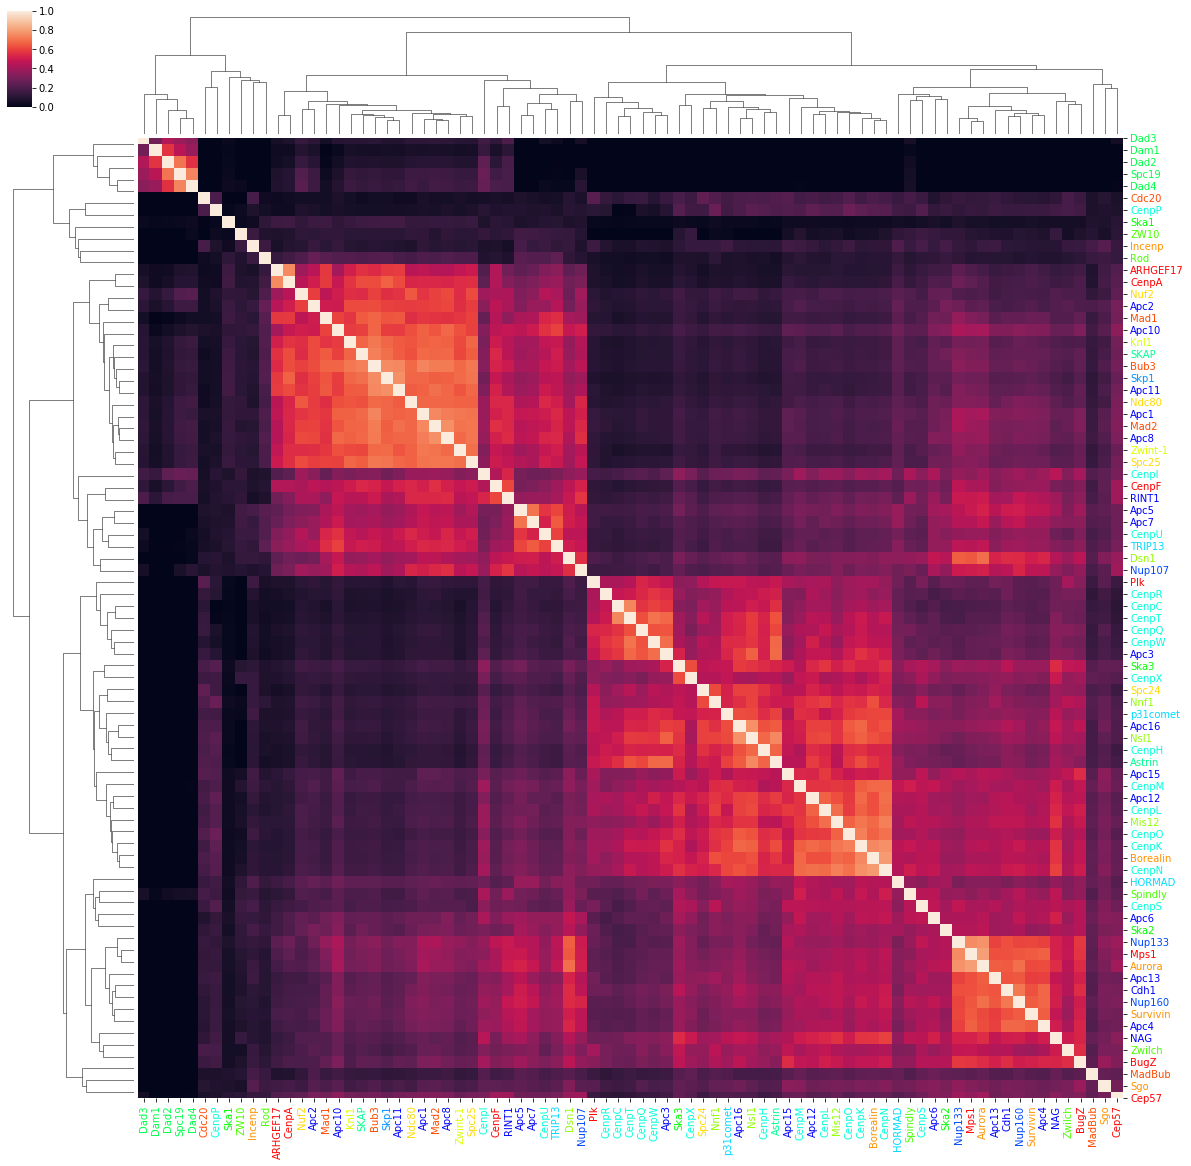

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt
import colour
#we can perform an all vs all comparison to replicate the results in va hoof et al
import time 

with PdfPages('kineto_hash.pdf') as pdf:
    print(len(list(profiles.hashsig)) )
    start = time.time()
    print( list( profiles.hashsig )[0].jaccard(list(profiles.hashsig)[1]) )       
    print(time.time()-start)

    jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(list(profiles.hashsig)) ] for i,h1 in enumerate(list(profiles.hashsig))]


    jkern = np.asarray(jkern)
    jkern+=jkern.T
    np.fill_diagonal( jkern , 1 )
    print(jkern)
    g = sns.clustermap( jkern , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20) )
    colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
    red = colour.Color('red')
    blue = colour.Color('blue')
    colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
    colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
    colordict = { n:colors[colordict[n]] for n in colordict}
    red = colour.Color('red')
    blue = colour.Color('blue')

    for tick_label in g.ax_heatmap.axes.get_yticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)

    for tick_label in g.ax_heatmap.axes.get_xticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)
    pdf.savefig()

    g.savefig('kineto_hash.eps', format='eps')

    plt.show()

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


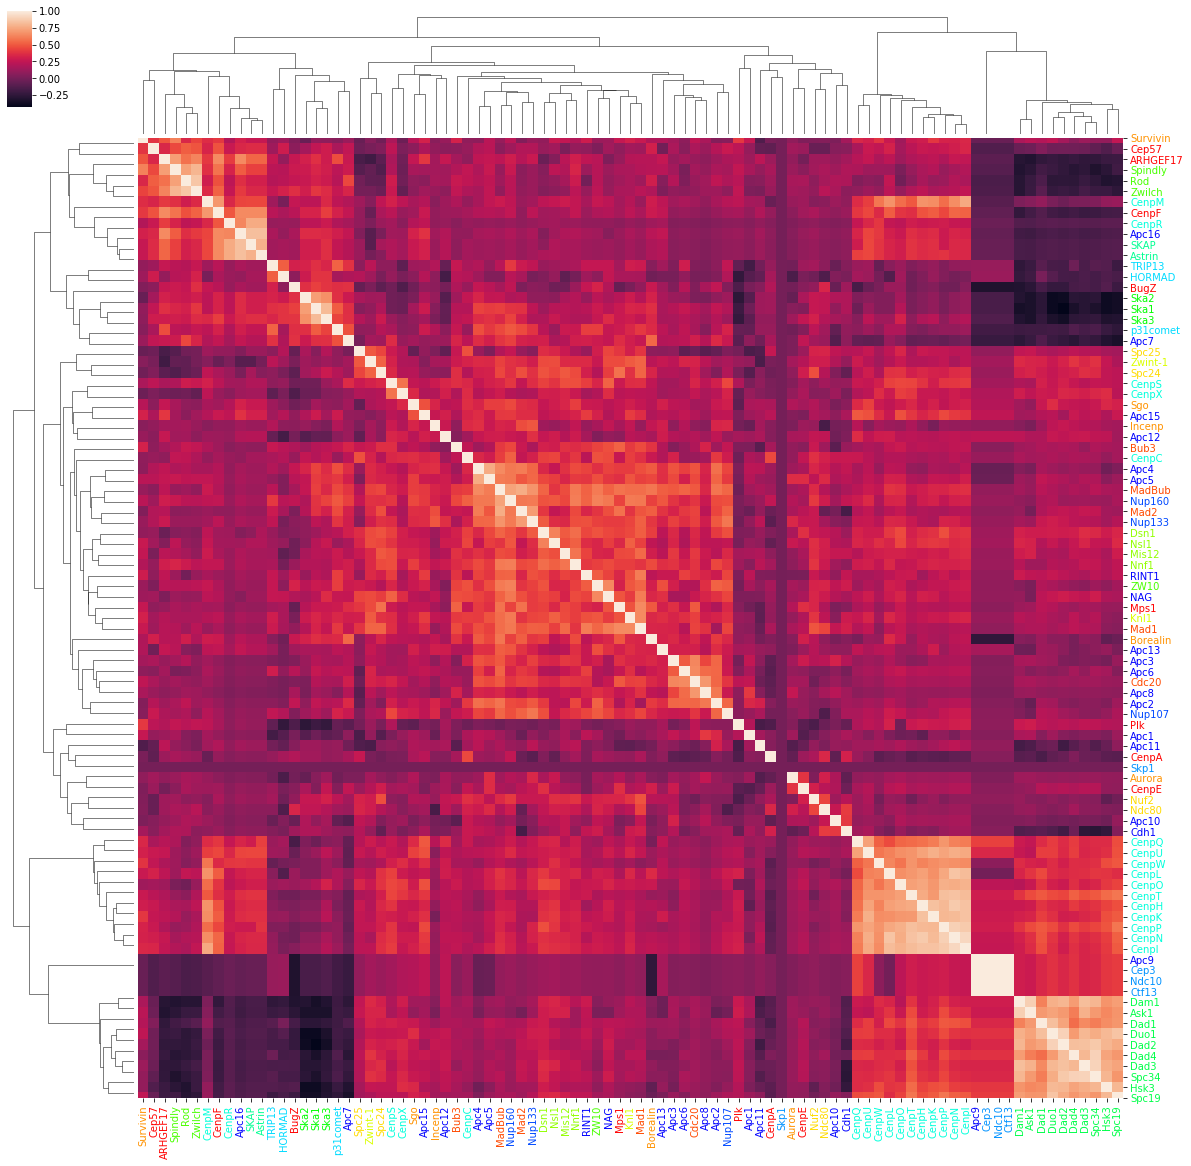

In [46]:
#lets load the original pearson correlation data and compare to our jaccard similarity metric
pearsondf = pd.DataFrame.from_csv('./kinetocore_pearson.csv')

with PdfPages('kineto_pearson.pdf') as pdf:

    g = sns.clustermap( pearsondf , xticklabels= pearsondf.index , yticklabels= pearsondf.index , figsize = (20,20) )

    colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
    red = colour.Color('red')
    blue = colour.Color('blue')
    colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
    colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
    colordict = { n:colors[colordict[n]] for n in colordict}
    red = colour.Color('red')
    blue = colour.Color('blue')

    for tick_label in g.ax_heatmap.axes.get_yticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)

    for tick_label in g.ax_heatmap.axes.get_xticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)
    pdf.savefig()
    g.savefig('kineto_pearson.eps', format='eps')
    plt.show()


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


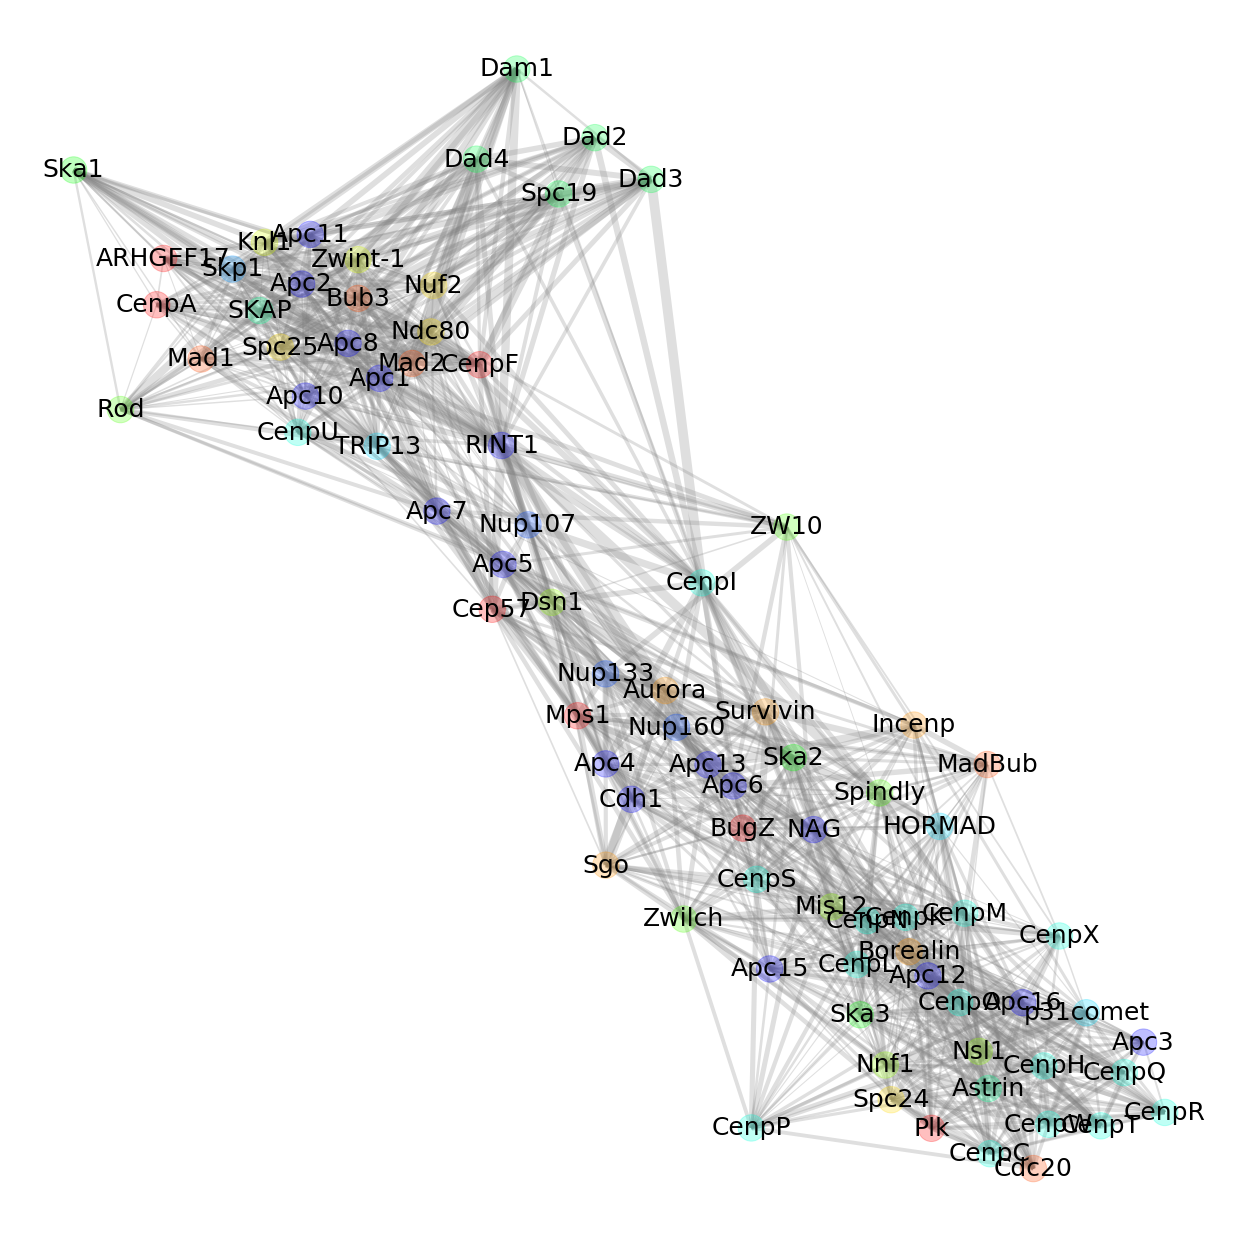

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


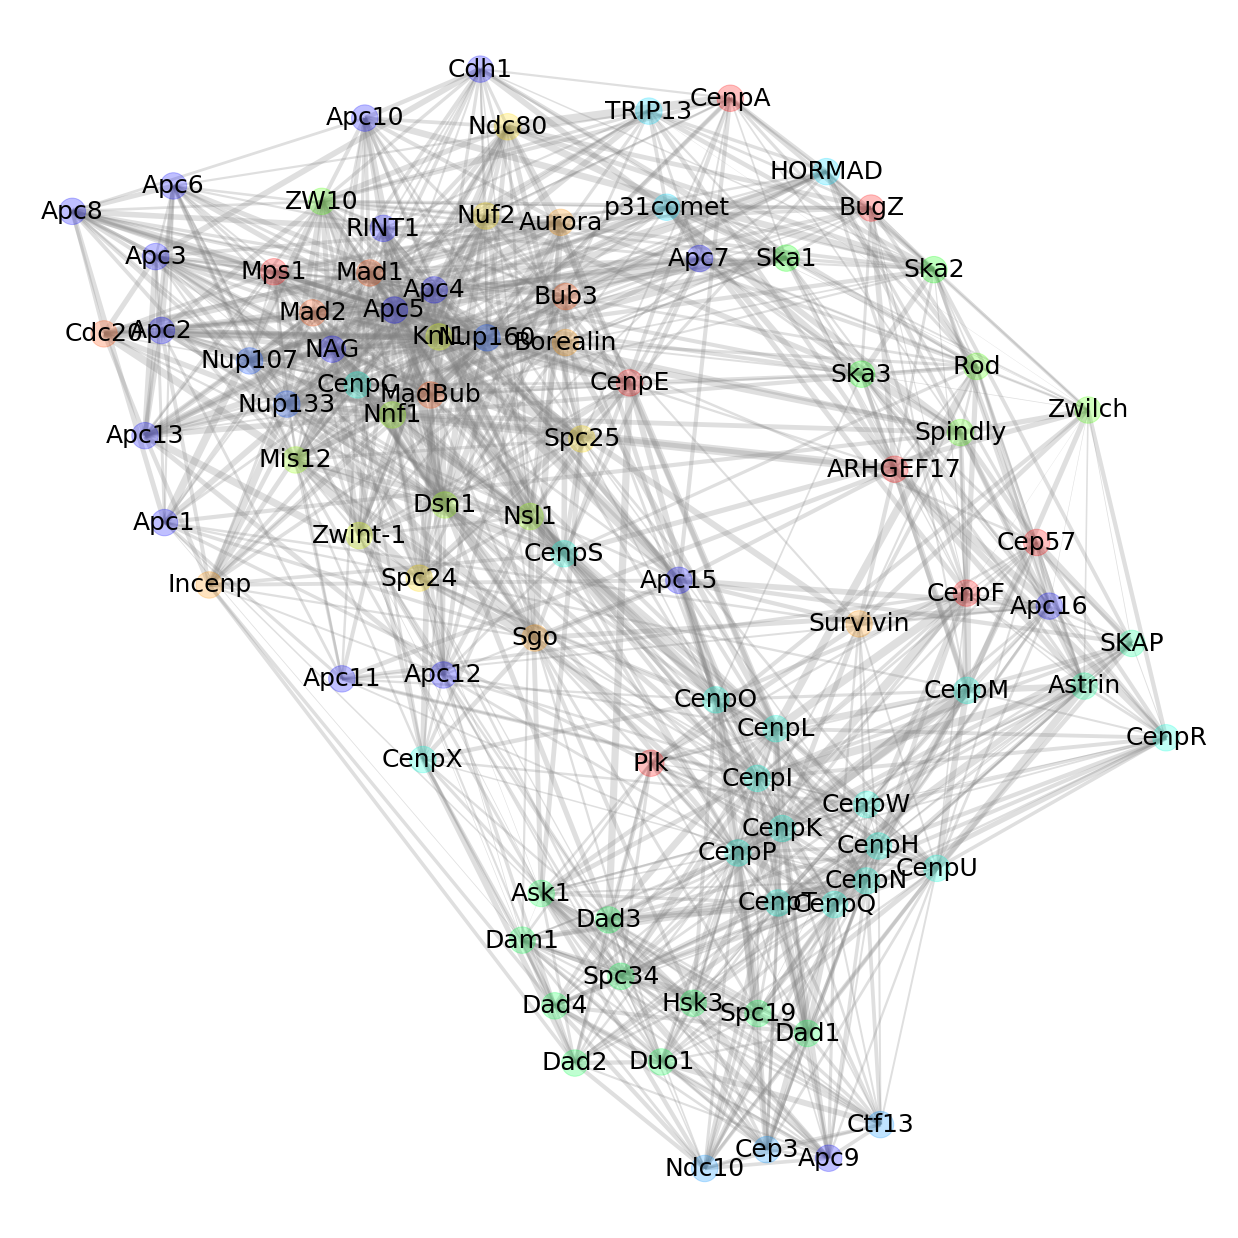

In [47]:
#lets compare the organisation of the complex in both as graph structures
import networkx as nx
pG = nx.from_numpy_matrix( pearsondf.to_numpy() )
jG = nx.from_numpy_matrix( jkern )
pG = nx.relabel_nodes( pG , { i:p for i,p in enumerate(pearsondf.index) })
jG = nx.relabel_nodes( jG , { i:p for i,p in enumerate(profiles.name) })
print(pG)
print(jG)
alledges={}
shared={}
topk = 20

for g in [jG, pG]:
    finalg = nx.Graph()
    for n in g.nodes():
        alledges = [ (n,l) for l in g.neighbors(n) if n != l ]
        weights = [ g[e[0]][e[1]]['weight'] for e in alledges]
        keep = np.flip(np.argsort(weights))[0:topk]
        edges = [ alledges[s] for s in list(keep) ]
        [  finalg.add_edge(e[0],e[1], weight= max(1/(i +1),g[e[0]][e[1]]['weight']) ) if finalg.has_edge(e[0],e[1]) else finalg.add_edge(e[0],e[1], weight= g[e[0]][e[1]]['weight']) for i,e in enumerate(edges)   ]
    pos = nx.spring_layout( finalg , weight='weight')
    weights = np.asarray([e[2]['weight'] for e in g.edges(data = True)])
    plt.figure( figsize = (17,17))
    cvec = [ colordict[n] if n in colordict else 'black' for n in finalg.nodes()]
    nx.draw(finalg, pos=pos, edge_color='grey', width= 2*np.log( weights ), node_size= 700, node_color = cvec ,alpha = .25 ) 
    labels=nx.draw_networkx_labels(finalg , pos = pos , font_size= 25 )
    plt.show()


In [48]:
from scipy.stats import pearsonr , spearmanr , brunnermunzel
pearsondf = pearsondf[profiles.name]
pearsondf = pearsondf.loc[profiles.name]
pearsonmat = pearsondf.to_numpy()
print(pearsonmat.shape)

print(jkern.shape)
print('spearman')
print( spearmanr( pearsonmat.ravel(), jkern.ravel() ))
print( 'pearson')
print( pearsonr( pearsonmat.ravel(), jkern.ravel() ))
print('permutation')
print( brunnermunzel( pearsonmat.ravel(), jkern.ravel() ))

(81, 81)
(81, 81)
spearman
SpearmanrResult(correlation=0.17726330412936042, pvalue=1.8658666430120212e-47)
pearson
(0.307963058209016, 3.8301423513019886e-144)
permutation
BrunnerMunzelResult(statistic=15.951644176641043, pvalue=0.0)


In [49]:
#now we can add in the HOGs we found in our search
#the clustering shows a similar structure
print(len(profiles.index))

#lets query the the lsh with each HOG
res = { h: p.hog_query(hog_id= h, k = 10 ) for h in list(profiles.index) }
profiles_full = p.pull_hashes( set(res.keys()).union( set( [ h for results in res.values() for h in results ] ) ) )

names = dict( zip( kinetodf.HOG , kinetodf.name) )

profiles_ = { h: {'hashsig': profiles_full[h] , 'name': names[h]  } if h in names else {'hashsig': profiles_full[h] , 'name': ''  }   for h in profiles_full }

profiles_full = pd.DataFrame.from_dict( profiles_ , orient='index' )

print(profiles_full)
print(len(profiles_full))


81
                                                       hashsig    name
251348       <datasketch.weighted_minhash.WeightedMinHash o...        
252023       <datasketch.weighted_minhash.WeightedMinHash o...        
253927       <datasketch.weighted_minhash.WeightedMinHash o...        
255123       <datasketch.weighted_minhash.WeightedMinHash o...        
255506       <datasketch.weighted_minhash.WeightedMinHash o...        
255519       <datasketch.weighted_minhash.WeightedMinHash o...        
255542       <datasketch.weighted_minhash.WeightedMinHash o...        
255648       <datasketch.weighted_minhash.WeightedMinHash o...        
255675       <datasketch.weighted_minhash.WeightedMinHash o...        
255707       <datasketch.weighted_minhash.WeightedMinHash o...        
255729       <datasketch.weighted_minhash.WeightedMinHash o...        
255819       <datasketch.weighted_minhash.WeightedMinHash o...        
255867       <datasketch.weighted_minhash.WeightedMinHash o...        
255

In [50]:
#lets perform and enrichment on each cluster to see if we were able to pull down some functional modules
#some of these results may be unknown kinetochore proteins under an open world assumption
jkern0 = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(list(profiles_full.hashsig) ) ] for i,h1 in enumerate(list( profiles_full.hashsig ) ) ]
jkern0 = np.asarray(jkern0)
jkern0+=jkern0.T
np.fill_diagonal( jkern0 , 1 )

(142,)
graph gen


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


coloring
saving


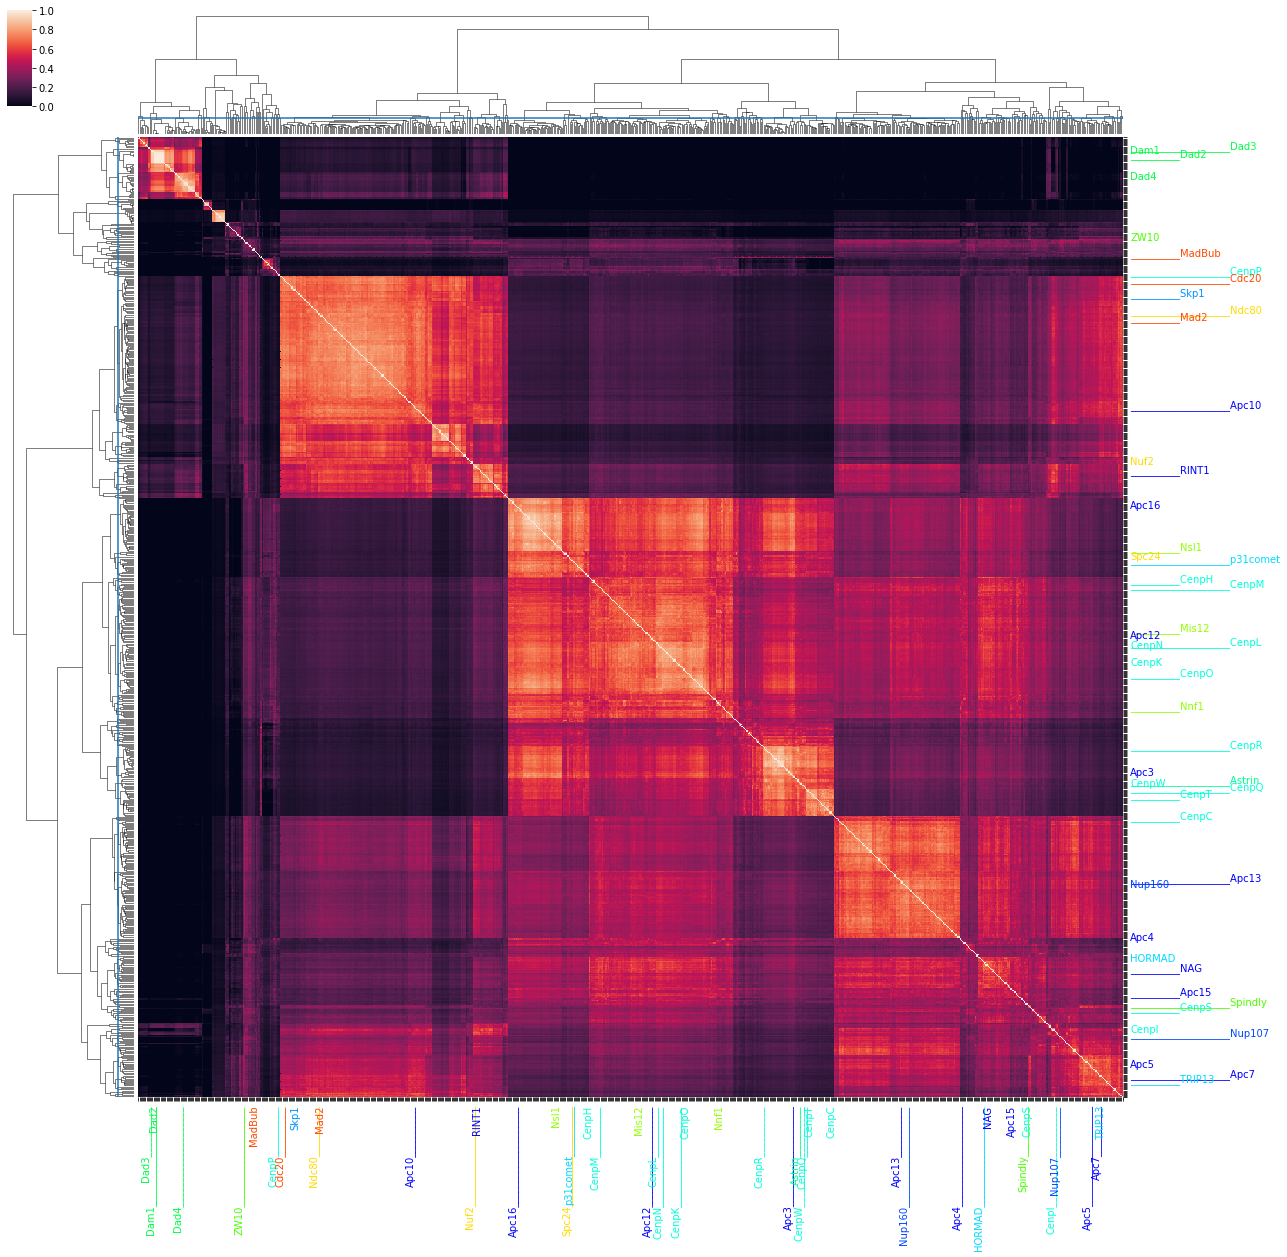

DONE


In [57]:
import scipy

with PdfPages('kineto_augment.pdf') as pdf:

    cutoff = 1.3
    z = scipy.cluster.hierarchy.linkage(jkern0, method='average', metric='euclidean')
    clusters = scipy.cluster.hierarchy.fcluster(z, t=cutoff, criterion='distance')
    colors = [ c.hex_l for c in red.range_to( blue , len(set(clusters)) ) ]
    colordict2 = dict( zip( list(set(clusters)) , list(colors)))
    rowcolors = [ colordict2[c] for c in clusters]
    print(np.unique(clusters).shape )
    spacer = itertools.cycle([0,5 ,10])
    
    spacednamesy = [  '__' * next(spacer) + p if len(p)> 0 else '' for p in profiles_full.name ]
    spacednamesx = [  p +  '__' * next(spacer) if len(p)> 0 else '' for p in profiles_full.name ]
    print('graph gen')
    g = sns.clustermap( jkern0 , xticklabels= spacednamesx, yticklabels= spacednamesy , figsize = (20,20) ,  rasterized=True )
    colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
    red = colour.Color('red')
    blue = colour.Color('blue')
    colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
    colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
    colordict = { n:colors[colordict[n]] for n in colordict}
    red = colour.Color('red')
    blue = colour.Color('blue')
    print('coloring')

    g.ax_row_dendrogram.axvline(cutoff)
    g.ax_col_dendrogram.axhline(cutoff)

    for tick_label in g.ax_heatmap.axes.get_yticklabels():
        l = tick_label.get_text()
        if l.replace('_','') in colordict:
            c =colordict[ l.replace('_','')]
        else:
            c = '#000000'
        tick_label.set_color(c)

    for tick_label in g.ax_heatmap.axes.get_xticklabels():
        l = tick_label.get_text()
        if l.replace('_','') in colordict:
            c =colordict[ l.replace('_','')]
        else:
            c = '#000000'
        tick_label.set_color(c)   
    print('saving')
    pdf.savefig()
    print('done pdf')
    plt.show()

    g.savefig('kineto_augment.eps', format='eps' )
    print('DONE')
    

In [41]:
#we can enrich for functionality in each cluster
goares = {}
dfs = []
for c in list(np.unique(clusters)):
    sub = profiles_full.iloc[ np.where( clusters == c ) ]
    #if our cluster contains a query it makes sense to see if we found some interactors related to it
    if len(sub.name.unique()) >1 : 
        print(sub.name.unique())
        queries  = set(sub[ sub.index.map(lambda x : 'HOG' in x )].index )
        #remove the query from search results
        searchfams = [str(hogid2fam(h)) for h in queries ]
        searchres = sub[ sub.index.map(lambda x : 'HOG' not in x )]
        searchres  = searchres[~searchres.index.isin(searchfams)]
        #run a go enrichment study on the cluster
        goares[c] = goa.run_GOEA_onresults( searchres.index.map( hogid2fam ) , p.db_obj, study)
        namestr = ''.join([ n+'_' for n in sub.name if len(n)>0 ][0:5])
        #output the results
        goea_results_sig = [r for r in goares[c][0] if r.p_fdr_bh < 0.1]
        study.wr_tsv(namestr + "_kinetocluster_enrich.tsv", goea_results_sig)
        try:
            res = pd.DataFrame.from_csv(namestr + "_kinetocluster_enrich.tsv" , sep= '\t' , header = None)
            res['queries'] = ''.join( [ n + ' ' for n in sub.name ])
            dfs.append(res)

        except:
            print('no res')
        print(len(goea_results_sig))

finaldf = pd.concat(dfs)
finaldf.to_csv('kineto_augment_goenrich.csv')
print('DONE')

['' 'Dad3']
compiling hogs
0
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 209 IDs ...
100%    106 of    106 study items found in association
 51%    106 of    209 study items found in population(9897212)
Calculating 27,917 uncorrected p-values using fisher_scipy_stats
  27,917 GO terms are associated with 9,897,196 of 9,897,212 population items
      43 GO terms are associated with    106 of    209 study items
  METHOD fdr_bh:
      27 GO terms found significant (< 0.15=alpha) ( 23 enriched +   4 purified): statsmodels fdr_bh
      55 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
done
DONE!
     26 items WROTE: Dad3__kinetocluster_enrich.tsv
26
['' 'Dam1']
compiling hogs
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 0 IDs ...
done
DONE!
      0 items. NOT WRITING Dam1__kinetocluster_enrich.tsv
no res
0
['' 'Dad2']
compiling 

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


10
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 736 IDs ...
100%    579 of    579 study items found in association
 79%    579 of    736 study items found in population(9897212)
Calculating 27,917 uncorrected p-values using fisher_scipy_stats
  27,917 GO terms are associated with 9,897,196 of 9,897,212 population items
      89 GO terms are associated with    579 of    736 study items
  METHOD fdr_bh:
      82 GO terms found significant (< 0.15=alpha) ( 49 enriched +  33 purified): statsmodels fdr_bh
     472 study items associated with significant GO IDs (enriched)
     144 study items associated with significant GO IDs (purified)
done
DONE!
     80 items WROTE: Dad2__kinetocluster_enrich.tsv
80
['' 'Dad4']
compiling hogs
0
10
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 868 IDs ...
100%    794 of    794 study items found in association
 91%    794 of    868 study items found in population(9897212)
C

In [ ]:
#now lets look at a completely unknown network: sexual reproduction
#lets start with 3 queries of known proteins


In [7]:
#search Hap2 SPo11 Gex1
#mapping Hap2's uniprot ID to its OMA entry and querying with the OMA HOG
#we can use a pretty broad search to get the 100 closest profiles since we're only considering one HOG at a time
hap2hogs = p.hog_query(hog_id=  grabHog('ARATH26614') ,  k=100)
#same for gex1
gexhogs = p.hog_query(hog_id= grabHog('ARATH38809'), k=100)
#and spo11
spohogs = p.hog_query(hog_id=  grabHog('ARATH19148') , k=100 )

In [ ]:
#reading in the sequence identifiers for all HOGs pulled down in a search from the HDF5 can take some time
goares = {}
#'hap':hap2hogs, 'gex':gexhogs,
searches = {'hap2':hap2hogs , 'gex1':gexhogs,  'spo11':spohogs}
for res in searches:
    enrich = goa.run_GOEA_onresults( searches[res], p.db_obj, study)
    goea_results_sig = [r for r in enrich[0] if r.p_fdr_bh < 0.05]
    study.wr_tsv(res + "_enrich.tsv", goea_results_sig)


compiling hogs
0
10
20
30
40
50
60
70
80
90
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 6608 IDs ...
100%  4,585 of  4,585 study items found in association
 69%  4,585 of  6,608 study items found in population(9897212)
Calculating 27,917 uncorrected p-values using fisher_scipy_stats
  27,917 GO terms are associated with 9,897,196 of 9,897,212 population items
   1,022 GO terms are associated with  4,585 of  6,608 study items
  METHOD fdr_bh:
     586 GO terms found significant (< 0.15=alpha) (248 enriched + 338 purified): statsmodels fdr_bh
   3,380 study items associated with significant GO IDs (enriched)
   2,850 study items associated with significant GO IDs (purified)
done
DONE!
    526 items WROTE: hap2_enrich.tsv
compiling hogs
0
10
20
30
40
50
60
70
80
90
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 7173 IDs ...
100%  5,258 of  5,258 study items found in association
 73%  5,258 of  7,173 study

In [ ]:
for res in goares:
    print(len(goea_results_sig))

In [7]:
#And now let's try the same thing with a bigger list of candidate genes
#load reproduction pathway hogs. These were downloaded from the SGD database as tsv files by selecting salient go terms.
#I added a few non yeast entries and stuff from literature manually
hogdf = pd.DataFrame.from_csv('./repro_hogs.csv')
print(hogdf)
hogdf['HOG'] = hogdf['1'].map( grabHog )
hogdf = hogdf[ ~hogdf.HOG.isna() ]
hashes = p.pull_hashes( [h for h in hogdf.HOG if len(h)>0] )
hogdf['hashsig'] = hogdf.HOG.map(hashes)
hogdf = hogdf[ ~hogdf.hashsig.isnull() ]

hogdf = hogdf.drop_duplicates('3')
names = dict(zip( hogdf.HOG, hogdf['3']))


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


               0           1                     2      3  \
0.0   S000001692     YKL209C         S. cerevisiae   STE6   
1.0   S000002248     YDL090C         S. cerevisiae   RAM1   
2.0   S000006326     YPR122W         S. cerevisiae   AXL1   
0.0   S000000951     YER149C         S. cerevisiae   PEA2   
1.0   S000003944     YLL021W         S. cerevisiae   SPA2   
2.0   S000005215     YNL271C         S. cerevisiae   BNI1   
0.0   S000000818     YER016W         S. cerevisiae   BIM1   
1.0   S000004715     YMR109W         S. cerevisiae   MYO5   
2.0   S000004811     YMR198W         S. cerevisiae   CIK1   
3.0   S000005900     YOR373W         S. cerevisiae   NUD1   
4.0   S000006190     YPL269W         S. cerevisiae   KAR9   
5.0   S000006345     YPR141C         S. cerevisiae   KAR3   
0.0   S000000534     YCL029C         S. cerevisiae   BIK1   
1.0   S000000560     YCL055W         S. cerevisiae   KAR4   
2.0   S000001115     YHR073W         S. cerevisiae   OSH3   
3.0   S000001299     YIL

In [8]:
hogdf['sigsum'] = hogdf.hashsig.map(lambda x : np.sum(x.digest()))
hogdf = hogdf[hogdf.sigsum>0]
print(hogdf)


               0        1                     2      3  \
0.0   S000001692  YKL209C         S. cerevisiae   STE6   
1.0   S000002248  YDL090C         S. cerevisiae   RAM1   
2.0   S000006326  YPR122W         S. cerevisiae   AXL1   
1.0   S000003944  YLL021W         S. cerevisiae   SPA2   
2.0   S000005215  YNL271C         S. cerevisiae   BNI1   
0.0   S000000818  YER016W         S. cerevisiae   BIM1   
1.0   S000004715  YMR109W         S. cerevisiae   MYO5   
5.0   S000006345  YPR141C         S. cerevisiae   KAR3   
0.0   S000000534  YCL029C         S. cerevisiae   BIK1   
1.0   S000000560  YCL055W         S. cerevisiae   KAR4   
2.0   S000001115  YHR073W         S. cerevisiae   OSH3   
5.0   S000003571  YJL034W         S. cerevisiae   KAR2   
7.0   S000004669  YMR065W         S. cerevisiae   KAR5   
1.0   S000000112  YBL016W         S. cerevisiae   FUS3   
3.0   S000001661  YKL178C         S. cerevisiae   STE3   
6.0   S000004354  YLR362W         S. cerevisiae  STE11   
1.0   S0000058

In [9]:
#lets take a look at the clustering of our queries to see if some are coevolving and we can already notice some organisation
jkern2 = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(hogdf.hashsig) ] for i,h1 in enumerate(hogdf.hashsig)]
jkern2 = np.asarray(jkern2)
jkern2+=jkern2.T
np.fill_diagonal(jkern2 , 1 )


In [10]:
import seaborn as sns

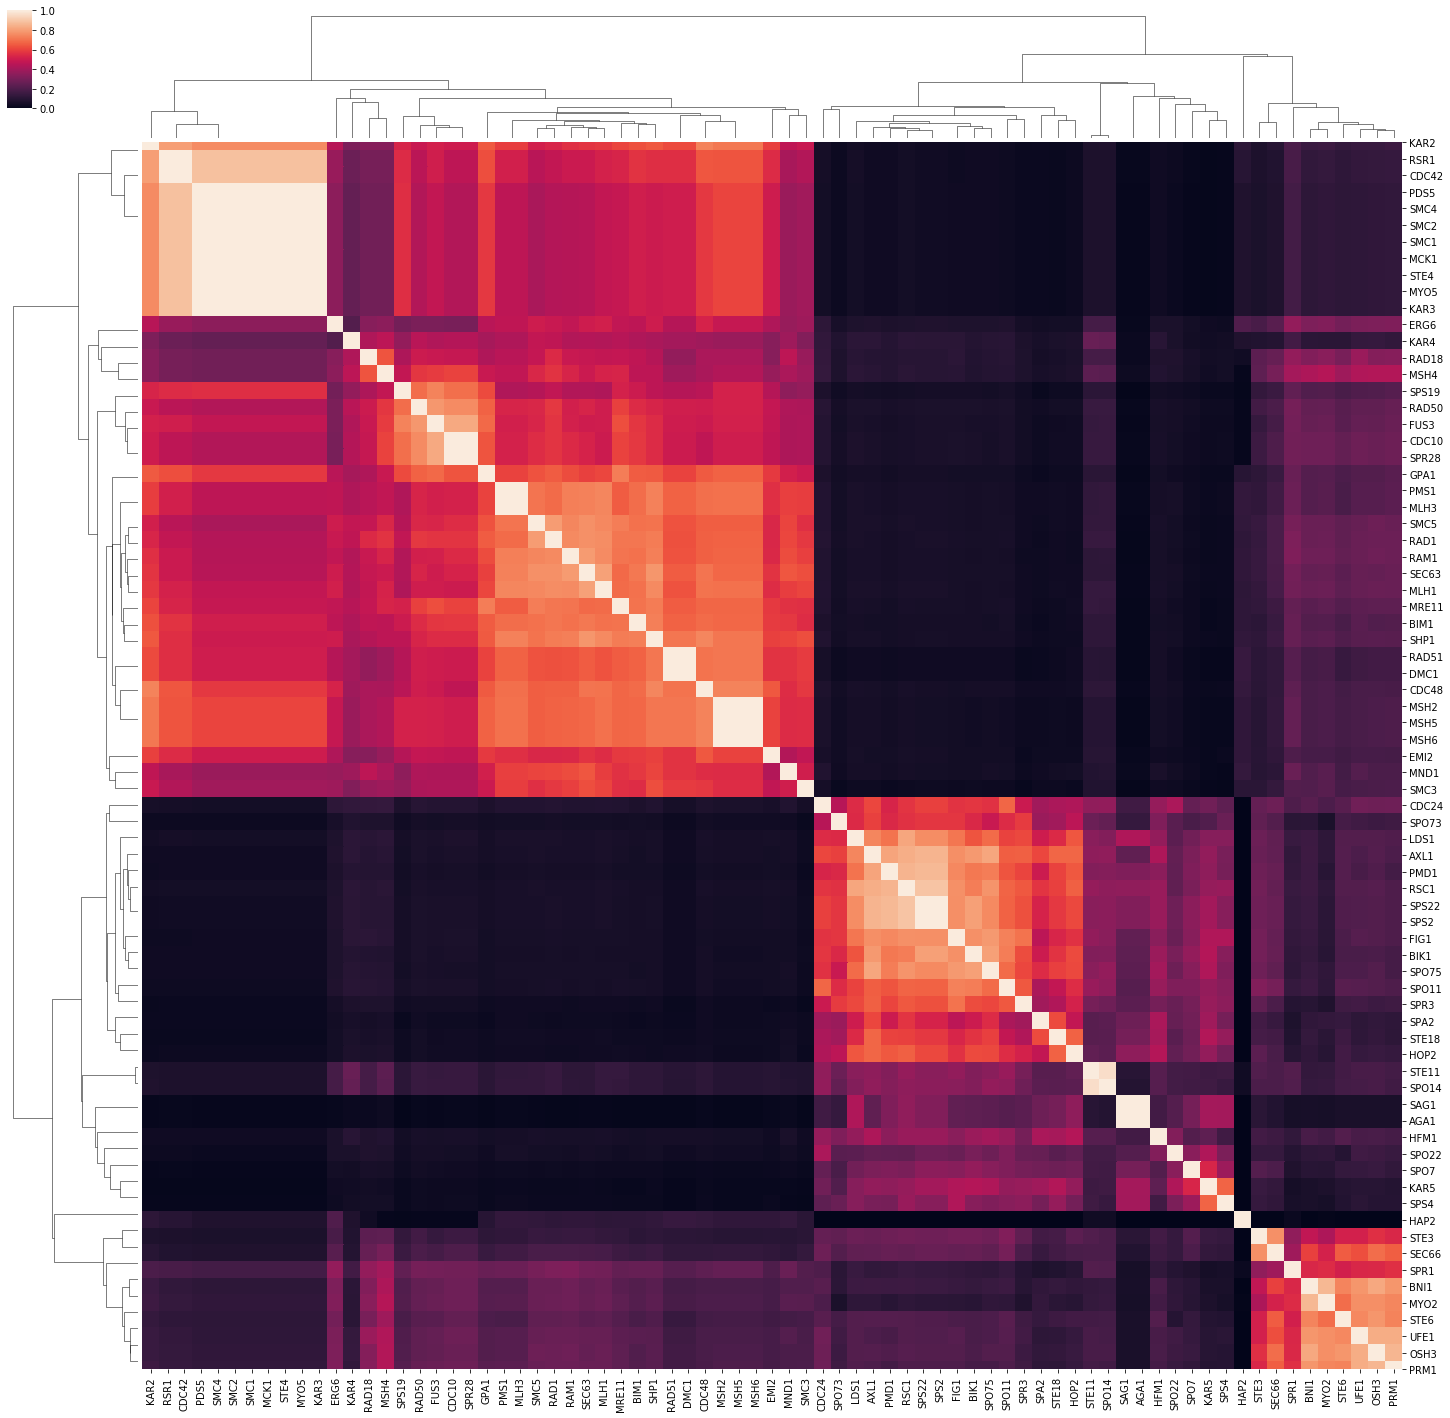

In [11]:
with PdfPages('repro_hash.pdf') as pdf:
    g = sns.clustermap( jkern2 , xticklabels= hogdf['3'] , yticklabels= hogdf['3'] , figsize = (25,25) )
    pdf.savefig()


In [12]:
#now lets fill in our network with some putative interactors
res = { h: p.hog_query( hog_id=str(h) , k = 20 ) for h in hogdf.HOG}
Hogs = [ h for results in res.values() for h in results ] + list(res.keys())

In [14]:
profiles = profiles = p.pull_hashes( set(Hogs) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  } if h in names else {'hashsig': profiles[h] , 'name': ''  }   for h in profiles }
profiles = pd.DataFrame.from_dict( profiles , orient='index' )

print(profiles.name.unique())
print(len(profiles.name.unique()))

print(len(profiles))




['' 'AGA1' 'SAG1' 'SPS4' 'AXL1' 'KAR5' 'RSC1' 'HOP2' 'PMD1' 'SPR3' 'SPO75'
 'STE18' 'FIG1' 'BIK1' 'SPS2' 'SPS22' 'SPO73' 'SPA2' 'LDS1' 'SPO7' 'STE3'
 'SEC66' 'SPO11' 'HFM1' 'STE6' 'UFE1' 'CDC24' 'OSH3' 'BNI1' 'PRM1' 'SPO22'
 'RAD50' 'FUS3' 'STE11' 'MYO2' 'SPO14' 'MSH4' 'CDC10' 'SPR28' 'SPS19'
 'SPR1' 'MLH1' 'KAR2' 'MSH6' 'MSH5' 'MSH2' 'RAM1' 'HAP2' 'MRE11' 'KAR4'
 'RAD18' 'BIM1' 'SHP1' 'GPA1' 'CDC42' 'RSR1' 'MLH3' 'PMS1' 'RAD1' 'SMC5'
 'RAD51' 'DMC1' 'CDC48' 'ERG6' 'MND1' 'SEC63' 'PDS5' 'STE4' 'SMC2' 'MCK1'
 'SMC1' 'MYO5' 'SMC4' 'KAR3' 'EMI2' 'SMC3']
76
1012


In [15]:
#lets calculate a new jaccard kernel for all of our search results and queries 
#again we can divide our results into clusters and try to see if each has a functional signature using GO enrichment

jkern3 = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(profiles.hashsig) ] for i,h1 in enumerate(profiles.hashsig)]
jkern3 = np.asarray(jkern3)

jkern3+=jkern3.T
np.fill_diagonal(jkern3 , 1 )




In [16]:
print(jkern3)

[[1.         0.81640625 0.68359375 ... 0.01367188 0.01953125 0.01171875]
 [0.81640625 1.         0.68359375 ... 0.015625   0.01953125 0.01367188]
 [0.68359375 0.68359375 1.         ... 0.0078125  0.015625   0.01367188]
 ...
 [0.01367188 0.015625   0.0078125  ... 1.         0.50585938 0.3984375 ]
 [0.01953125 0.01953125 0.015625   ... 0.50585938 1.         0.47460938]
 [0.01171875 0.01367188 0.01367188 ... 0.3984375  0.47460938 1.        ]]


In [19]:
cutoff = 0.995
import scipy

z = scipy.cluster.hierarchy.linkage(jkern3, method='average', metric='euclidean')
clusters = scipy.cluster.hierarchy.fcluster(z, t=cutoff, criterion='distance')
print(clusters)
print(len(np.unique(clusters)))


[ 70  70  70 ... 163 184 180]
215


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



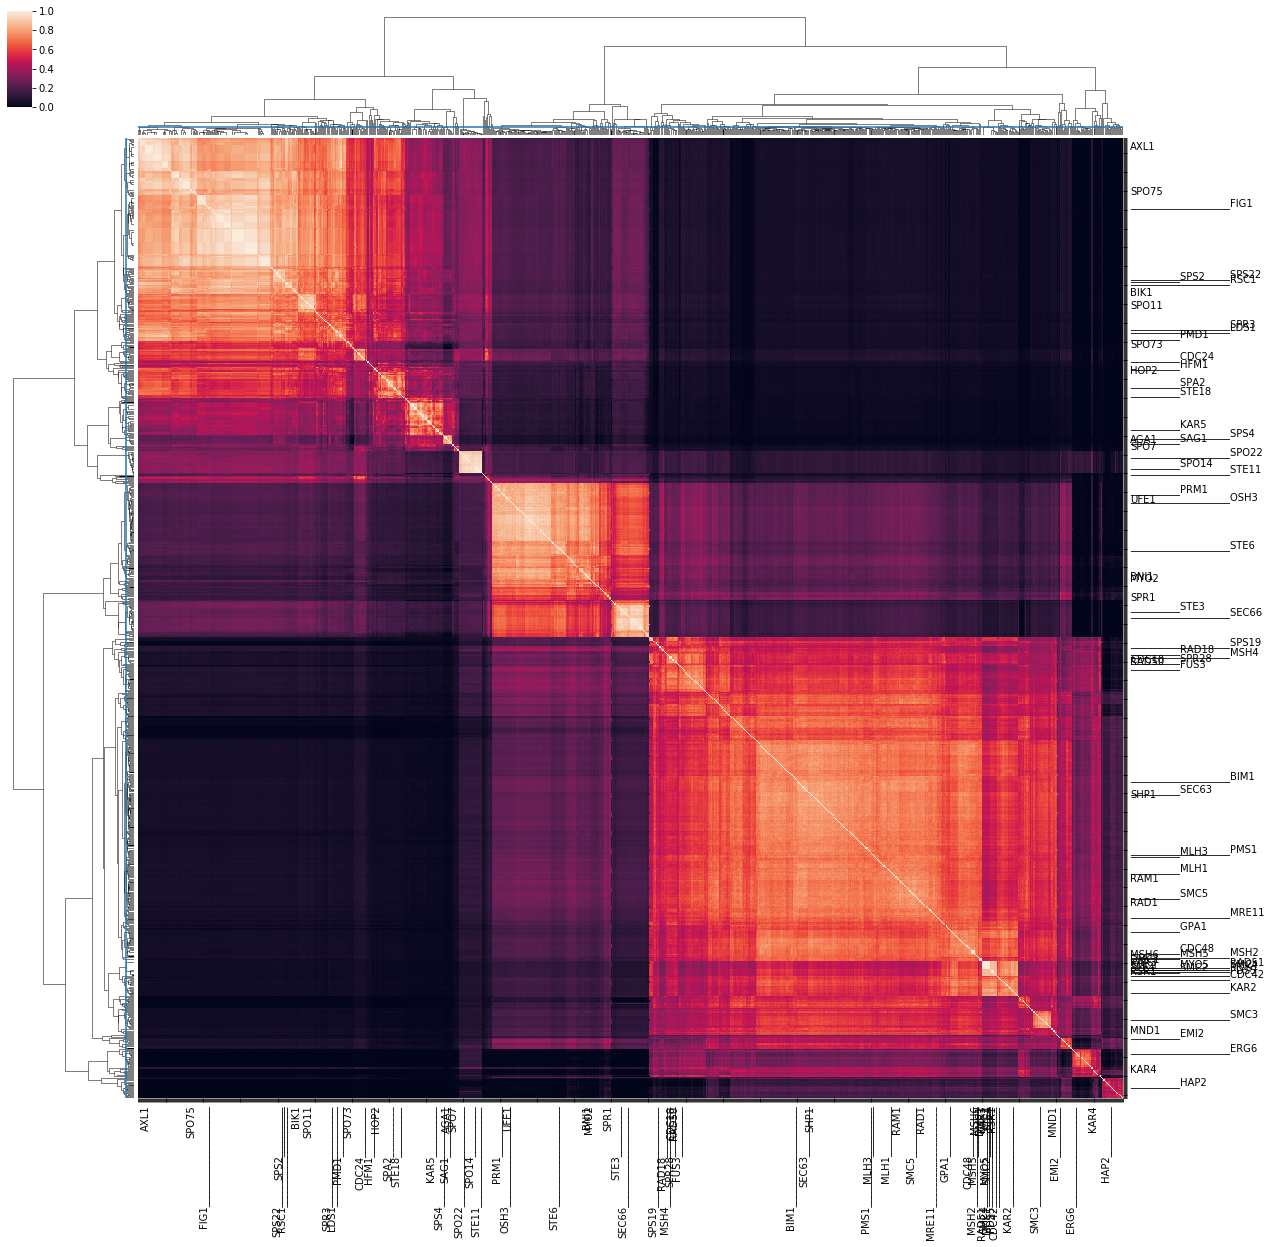

In [39]:
import itertools

with PdfPages('repro_hash_augment.pdf') as pdf:

    #colors = [ c.hex_l for c in red.range_to( blue , len(set(clusters)) ) ]
    #colordict2 = dict( zip( list(set(clusters)) , list(colors)))
    #rowcolors = [ colordict2[c] for c in clusters]
    
    spacer = itertools.cycle([0,5 ,10])
    
    spacednamesy = [  '__' * next(spacer) + p if len(p)> 0 else '' for p in profiles.name ]
    spacednamesx = [  p +  '__' * next(spacer) if len(p)> 0 else '' for p in profiles.name ]

    g = sns.clustermap( jkern3 , xticklabels= spacednamesx, yticklabels= spacednamesy , rasterized = True  , figsize = (20,20)  )
    
    g.ax_row_dendrogram.axvline(cutoff)
    g.ax_col_dendrogram.axhline(cutoff)
    pdf.savefig()

    g.savefig('repro_hash_augment.eps' , format='eps')

    plt.show()
    

In [ ]:
#and here we perform our enrichment of each cluster with a query in it
goares = {}
from pyprofiler.utils.hashutils import hogid2fam
dfs = []
for c in np.unique(clusters):
    sub = profiles.iloc[ np.where( clusters == c ) ]
    #if our cluster contains a query it makes sense to see if we found some interactors related to it
    if len(sub.name.unique()) >1 : 
        print(sub.name.unique())
        
        queries  = set(sub[ sub.index.map(lambda x : 'HOG' in x )].index )
        #remove the query from search results
        searchfams = [str(hogid2fam(h)) for h in queries ]
        searchres = sub[ sub.index.map(lambda x : 'HOG' not in x )]
        searchres  = searchres[~searchres.index.isin(searchfams)]
        #run a go enrichment study on the cluster
        goares[c] = goa.run_GOEA_onresults( searchres.index.map( hogid2fam ) , p.db_obj, study)
        namestr = ''.join([ n+'_' for n in sub.name if len(n)>0 ])
        #output the results
        goea_results_sig = [r for r in goares[c][0] if r.p_fdr_bh < 0.1]
        print(len(goea_results_sig))
        study.wr_tsv(namestr + "_reprocluster_enrich.tsv", goea_results_sig)
        try:
            res = pd.DataFrame.from_csv(namestr + "_reprocluster_enrich.tsv" , sep= '\t' , header = None)
            res['queries'] = ''.join( [ n + ' ' for  n in sub.name ])
            dfs.append( res)
        except:
            print('no res')
        print(len(goea_results_sig))

finaldf = pd.concat(dfs)
finaldf.to_csv('repro_augment_goenrich.csv')
print('DONE')